# 图与网络模型及方法
蒋晨阳
## 单源最短路径

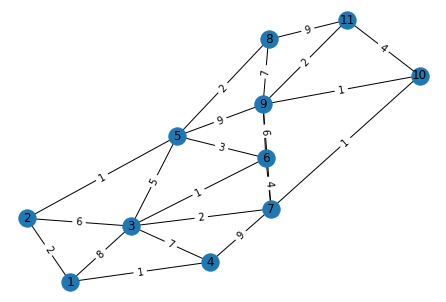

In [93]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# 建图
edges = [(1, 2, 2), (1, 3, 8), (1, 4, 1), (2, 3, 1), (2, 3, 6), (2, 5, 1), (3, 4, 7),
         (3, 5, 5), (3, 6, 1), (3, 7, 2), (4, 7, 9), (5, 6, 3), (5, 8, 2), (5, 9, 9),
         (6, 7, 4), (6, 9, 6), (7, 9, 3), (7, 10, 1), (8, 9, 7), (8, 11, 9), (9, 10, 1), (9, 11, 2), (10, 11, 4)]
g1 = nx.Graph()
g1.add_weighted_edges_from(edges, weight='weight')

# 绘制图像，显示边权需要添加 pos 参数
pos = nx.spring_layout(g1)
edge_labels = nx.get_edge_attributes(g1, 'weight')
nx.draw(g1, pos, with_labels=True)
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labels)
plt.show()

最短路径： 13


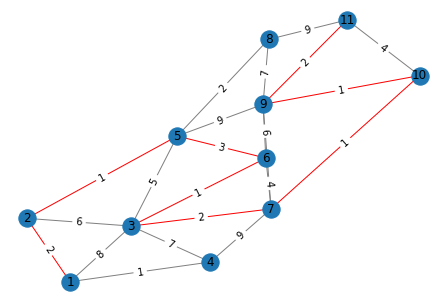

In [132]:
# 涂色函数，用于给指定边涂上颜色
def paint_edges(edges, paint_color, graph, default_color, weight, pos):
    # 默认颜色
    for e in graph.edges():
        graph[e[0]][e[1]]['color'] = default_color
    # 路径颜色
    for e in edges:
        graph[e[0]][e[1]]['color'] = paint_color
    
    # 得到所有边的颜色属性、权重
    edge_color_list = [e[2] for e in graph.edges(data='color')]
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    
    # 绘制图
    nx.draw(graph, pos=pos, edge_color=edge_color_list, with_labels=True)
    # 添加边权
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    plt.show()
    return

# 得到最短路径
path = nx.dijkstra_path(g1, 1, 11)

# 计算最短路径的长度
path_len = 0
for i in range(len(path) - 1):
    u, v = path[i], path[i+1]
    path_len += g1[u][v]['weight']

# 打印
print("最短路径：", path_len)

path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
paint_edges(path_edges, 'red', g1, 'grey', 'weight', pos)

## 每对顶点之间的最短路径

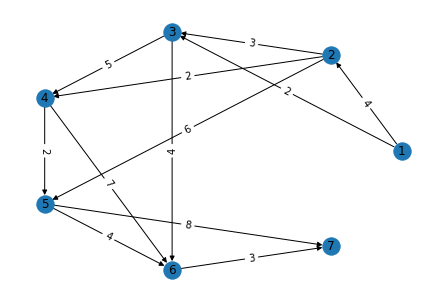

In [133]:
g2 = nx.DiGraph()
edges = [(1, 2, 4), (1, 3, 2), (2, 3, 3), (2, 4, 2), (2, 5, 6),
         (3, 4, 5), (3, 6, 4), (4, 5, 2), (4, 6, 7), (5, 6, 4), (5, 7, 8), (6, 7, 3)]
g2.add_weighted_edges_from(edges, weight='weight')

# 绘制图像
pos2 = nx.circular_layout(g2)
edge_labels = nx.get_edge_attributes(g2, 'weight')
nx.draw(g2, pos=pos2, with_labels=True)
nx.draw_networkx_edge_labels(g2, pos=pos2, edge_labels=edge_labels)
plt.show()

In [134]:
# 所有节点之间的最短路径
gen = nx.all_pairs_shortest_path(g2)

# 各个节点之间的可达性
# 注意，可达性仅限于无向图
comm = nx.communicability(g1)

# 获得非联通点的列表
iso = list(nx.isolates(g1))

## 最小生成树

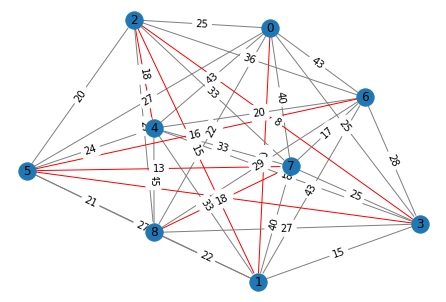

In [135]:
# 构造边
x = np.array([0, 5, 16, 20, 33, 23, 35, 25, 10])
y = np.array([15, 20, 24, 20, 25, 11, 7, 0, 3])
x1, x2 = np.meshgrid(x, x)
y1, y2 = np.meshgrid(y, y)
n = len(x)
dist = np.abs(x1-x2) + np.abs(y1-y2)
edges = [(u, v, dist[u][v]) for u in range(n) for v in range(n)]

g3 = nx.Graph()
g3.add_weighted_edges_from(edges, weight='weight')

# algorithm 可以是 kruskal, prim, boruvka
tree = nx.minimum_spanning_edges(g3, algorithm='kruskal', data='weight')

pos3 = nx.spring_layout(g3)
paint_edges(tree, 'red', g3, 'grey', 'weight', pos3)

## 最大流

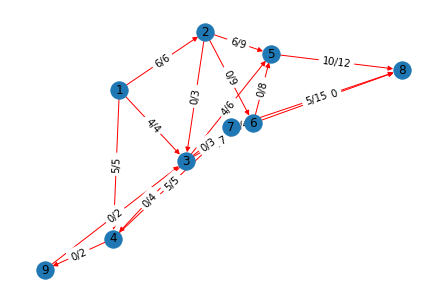

In [136]:
# 构造图
edges = [(1, 2, 6), (1, 3, 4), (1, 4, 5), (2, 3, 3), (2, 5, 9), (2, 6, 9),
         (3, 4, 4), (3, 5, 6), (3, 6, 7), (3, 7, 3), (4, 7, 5), (4, 9, 2),
         (5, 8, 12), (6, 5, 8), (6, 8, 10), (7, 6, 4), (7, 8, 15), (9, 3, 2)]
g4 = nx.DiGraph()
g4.add_weighted_edges_from(edges, weight='weight')

# 得到最大流
flow = nx.maximum_flow(g4, 1, 8, capacity='weight')

for e in g4.edges(data='weight'):
    g4[e[0]][e[1]]['color'] = 'grey'
    g4[e[0]][e[1]]['capacity'] = f'0/{e[2]}'
for u, adj in flow[1].items():
    for v, w in adj.items():
        g4[u][v]['color'] = 'red'
        a = g4[u][v]['weight']
        g4[u][v]['capacity'] = f'{w}/{a}'

edge_color_list = [e[2] for e in g4.edges(data='color')]
edge_labels = nx.get_edge_attributes(g4, 'capacity')

pos4 = nx.spring_layout(g4)
nx.draw(g4, pos=pos4, edge_color=edge_color_list, with_labels=True)
nx.draw_networkx_edge_labels(g4, pos4, edge_labels=edge_labels)
plt.show()